In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [6]:
df = pd.read_csv("height_weight_data.csv")

In [7]:
df.head()

,height_cm,weight_kg
0,165.2,58.3
1,172.5,71.2
2,158.7,52.1
3,180.1,85.6
4,162.3,48.9


In [8]:
df.tail()

,height_cm,weight_kg
95,160.9,50.8
96,181.6,89.1
97,159.8,50.2
98,173.8,75.9
99,163.1,53.0


Text(0, 0.5, 'height')

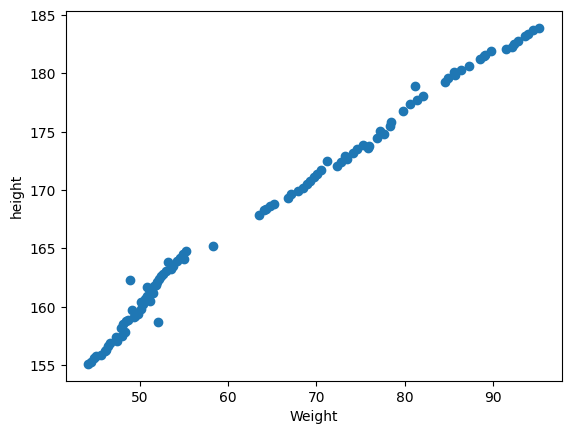

In [9]:
## scatter plot
plt.scatter(df['weight_kg'],df['height_cm'])
plt.xlabel("Weight")
plt.ylabel("height")

In [10]:
## corelation 
df.corr()   

,height_cm,weight_kg
height_cm,1.000000,0.994018
weight_kg,0.994018,1.000000


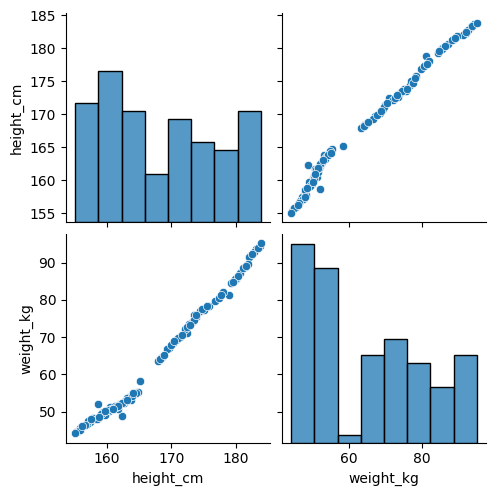

In [11]:
### seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [12]:
## idependent and dependent features
X=df[['weight_kg']]  ## independent feature should be dataframe or 2-D array
np.array(X).shape

(100, 1)

In [13]:
y=df['height_cm'] ## dependent feature can be in series form or can be in 1 D array  

In [14]:
np.array(y).shape

(100,)

In [15]:
### train test split
from sklearn.model_selection import train_test_split

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [17]:
X_train.shape

(75, 1)

In [18]:
## standardization
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [32]:
X_test = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regression = LinearRegression(n_jobs=-1)

In [35]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [36]:
regression.coef_

array([9.09140636])

In [37]:
regression.intercept_

np.float64(168.39333333333335)

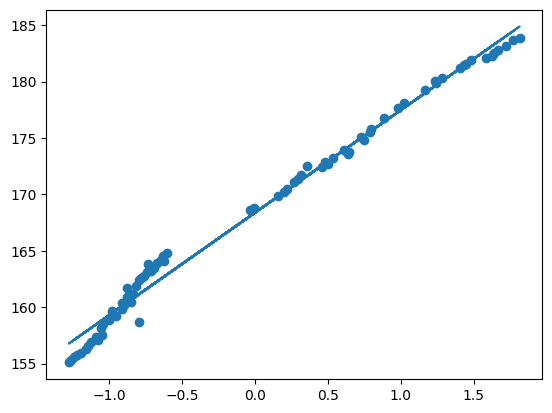

In [38]:
## plot best fit line with training data
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [39]:
## prediction for test data 
y_pred = regression.predict(X_test)

In [40]:
## performance metrics 
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [41]:
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.8773642805233024
0.6917773987917166
0.9366772552610116


In [42]:
from sklearn.metrics import r2_score

In [43]:
score = r2_score(y_test,y_pred)

In [44]:
print(score)

0.9856623930253429


In [45]:
## adjusted r score
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9850390188090534

In [48]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------- ----------------------- 3.9/9.5 MB 33.7 MB/s eta 0:00:01
   ------------------------------------ --- 8.7/9.5 MB 26.9 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 19.8 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
## OLS 
import statsmodels.api as sm

In [50]:
model = sm.OLS(y_train,X_train).fit()

In [51]:
prediction=model.predict(X_test)
print(prediction)

[ 10.82017846  -8.09326116  15.78288857   8.44910586  -7.32128403
   0.83961703   3.87238432  -9.25122685  -0.53891356  -3.84738696
   1.0050407    2.21814761  -0.649196    12.0884266   -7.54184893
  -9.03066196  -8.75495584   5.14063245   8.7799532   -0.98004334
  -8.53439095 -10.57461621   6.40888059  -9.3615093   -7.81755505]


In [52]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              height_cm   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.011
Method:                 Least Squares   F-statistic:                             0.2157
Date:                Sun, 21 Dec 2025   Prob (F-statistic):                       0.644
Time:                        22:49:58   Log-Likelihood:                         -490.89
No. Observations:                  75   AIC:                                      983.8
Df Residuals:                      74   BIC:                                      986.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [55]:
### prediction for new data
regression.predict(scaler.transform([[72]]))

d:\Data_Science\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([172.10029398])